In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob, os
import pandas as pd
import sys
import matplotlib.colors as colors
from matplotlib.lines import Line2D

import seaborn as sns
palette = sns.color_palette('tab10',8)
blue,orange,green,red = palette[0],palette[1],palette[2],palette[3]
sns.set_palette('tab10',8)
sns.set_style('whitegrid')

import astropy.units as u
from astropy.table import QTable
from astropy.io import ascii

In [2]:
#Import the information about the targets
targets_info = ascii.read('../spectra/targets_info_complete.csv').to_pandas().rename(columns={'ShortName':'Name'})

# The non-parametric analysis results
nonpar = ascii.read('../kinematic_analysis/Tables/nonparametric.txt').to_pandas()

# The outflow energetic properties: from the Speranza et al. 2022 method
outflow = ascii.read('../kinematic_analysis/Tables/outflow_energy_nonpar.txt').to_pandas()

# Comparisson between outflow mass rate and asymmetry

In [3]:
nonpar_outflow=pd.merge(nonpar,outflow,on='Name',how='left')

In [4]:
nonpar_outflow[['Name','Asymmetry','M.of']].sort_values('Asymmetry',ignore_index=True)

,Name,Asymmetry,M.of
0,J0924+01,-567.42,2.940
1,J0332-00,-262.70,2.320
2,J0234-07,-234.86,2.890
3,J0217-00,-184.95,3.200
4,J0249+00,-166.75,7.210
5,J0114+00,-147.15,5.390
6,J0904-00,-114.74,2.760
7,J0142+14,-113.31,20.200
8,J0948+00,-103.15,1.630
9,J0123+00,-58.33,2.490


Text(0, 0.5, '$\\dot{M}_{OF}$ [$M_\\odot$/yr]')

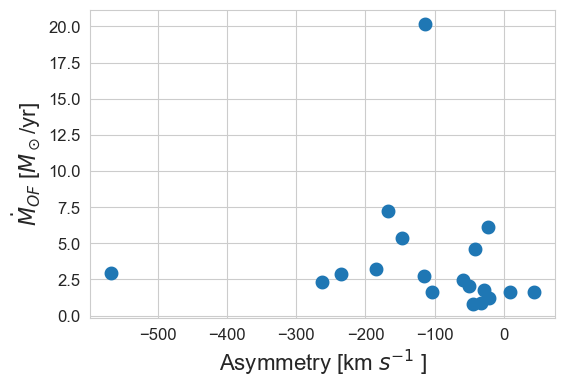

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
plt.scatter(nonpar_outflow['Asymmetry'],nonpar_outflow['M.of'],marker='o',linewidth=4)
ax.tick_params(axis='both', labelsize=12)
plt.xlabel(r'Asymmetry [km $s^{-1}$ ]',fontsize=16)
plt.ylabel(r'$\dot{M}_{OF}$ [$M_\odot$/yr]',fontsize=16)

## Young stellar populations

#### Asymmetry

In [6]:
nonpar_info=pd.merge(nonpar,targets_info,on='Name',how='left')
ysp_asym = nonpar_info[['Name','Asymmetry','YSP100']].sort_values('Asymmetry',ignore_index=True)
ysp_asym.to_csv('ysp_omr.txt',sep=',',index=False)

In [7]:
ysp_asym

,Name,Asymmetry,YSP100
0,J0924+01,-567.42,yes
1,J0332-00,-262.70,no
2,J0234-07,-234.86,no
3,J0217-00,-184.95,yes
4,J0249+00,-166.75,yes
5,J0114+00,-147.15,no
6,J0904-00,-114.74,yes
7,J0142+14,-113.31,yes
8,J0948+00,-103.15,no
9,J0123+00,-58.33,yes


#### Outflow mass rate

In [8]:
outflow_info = pd.merge(outflow,targets_info,on='Name',how='left')
ysp_omr = outflow_info[['Name','M.of','YSP100']].sort_values('M.of',ignore_index=True)
ysp_omr.to_csv('ysp_omr.txt',sep=',',index=False)

In [9]:
ysp_omr

,Name,M.of,YSP100
0,J0320+00,0.834,yes
1,J0848-01,0.884,no
2,J0334+00,1.210,yes
3,J0227+01,1.620,yes
4,J0948+00,1.630,no
5,J0217-01,1.650,yes
6,J0218-00,1.790,yes
7,J0025-10,2.020,yes
8,J0332-00,2.320,no
9,J0123+00,2.490,yes


## Radio emission

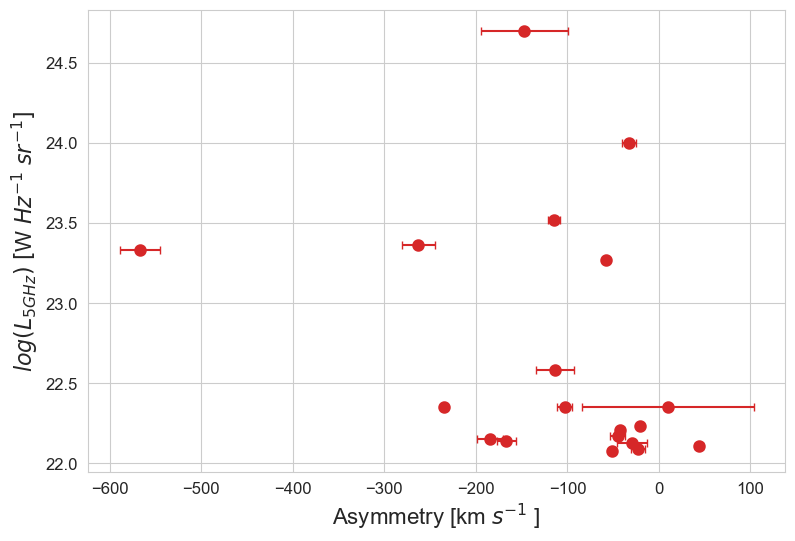

In [10]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(nonpar_info['Asymmetry'],nonpar_info['logL5GHz'],marker='o',color=red,linewidth=3)
plt.errorbar(nonpar_info['Asymmetry'],nonpar_info['logL5GHz'],xerr=nonpar_info['eAsymmetry'],fmt='none',ecolor=red,capsize=3)
ax.tick_params(axis='both', labelsize=12)
plt.xlabel(r'Asymmetry [km $s^{-1}$ ]',fontsize=16)
plt.ylabel(r'$log(L_{5GHz})$ $[$W $Hz^{-1}$ $sr^{-1}$$]$',fontsize=16)
plt.savefig('Graphs/radio_asym.pdf',bbox_inches='tight')

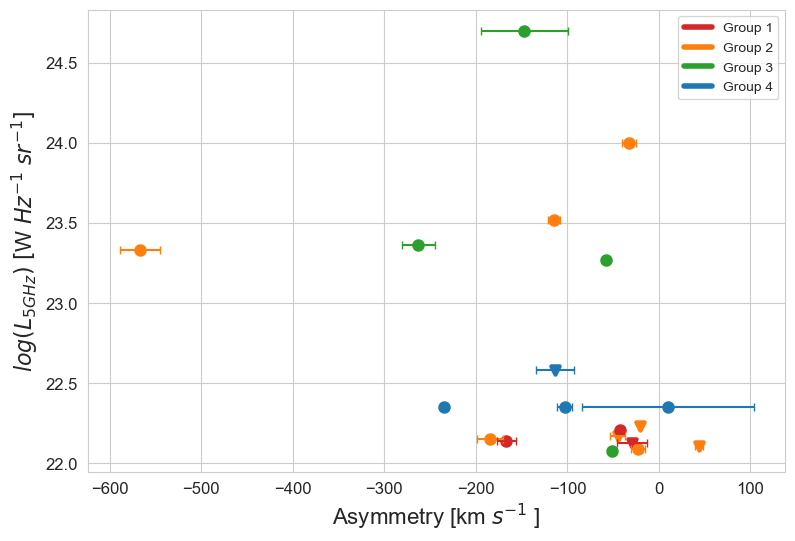

In [11]:
fig, ax = plt.subplots(figsize=(9,6))
for i in range(len(nonpar_info['Name'])):
    if nonpar_info['Name'][i]=='J0142+14'  or nonpar_info['Name'][i]=='J0218-00' or nonpar_info['Name'][i]=='J0227+01' or nonpar_info['Name'][i]=='J0320+00' or nonpar_info['Name'][i]=='J0334+00' or nonpar_info['Name'][i]=='J02358-00':
        if nonpar_info['groups'][i]==1:
            ax.scatter(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],marker='v',color=red,linewidth=3)
            plt.errorbar(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],xerr=nonpar_info['eAsymmetry'][i],fmt='none',ecolor=red,capsize=3)   
        if nonpar_info['groups'][i]==2:
            ax.scatter(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],marker='v',color=orange,linewidth=3)
            plt.errorbar(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],xerr=nonpar_info['eAsymmetry'][i],fmt='none',ecolor=orange,capsize=3)   
        if nonpar_info['groups'][i]==3:
            ax.scatter(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],marker='v',color=green,linewidth=3)
            plt.errorbar(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],xerr=nonpar_info['eAsymmetry'][i],fmt='none',ecolor=green,capsize=3)       
        if nonpar_info['groups'][i]==4:
            ax.scatter(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],marker='v',color=blue,linewidth=3)
            plt.errorbar(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],xerr=nonpar_info['eAsymmetry'][i],fmt='none',ecolor=blue,capsize=3)   

    else:
        if nonpar_info['groups'][i]==1:
            ax.scatter(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],marker='o',color=red,linewidth=3)
            plt.errorbar(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],xerr=nonpar_info['eAsymmetry'][i],fmt='none',ecolor=red,capsize=3)   
        if nonpar_info['groups'][i]==2:
            ax.scatter(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],marker='o',color=orange,linewidth=3)
            plt.errorbar(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],xerr=nonpar_info['eAsymmetry'][i],fmt='none',ecolor=orange,capsize=3)   
        if nonpar_info['groups'][i]==3:
            ax.scatter(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],marker='o',color=green,linewidth=3)
            plt.errorbar(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],xerr=nonpar_info['eAsymmetry'][i],fmt='none',ecolor=green,capsize=3)       
        if nonpar_info['groups'][i]==4:
            ax.scatter(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],marker='o',color=blue,linewidth=3)
            plt.errorbar(nonpar_info['Asymmetry'][i],nonpar_info['logL5GHz'][i],xerr=nonpar_info['eAsymmetry'][i],fmt='none',ecolor=blue,capsize=3)   

custom_lines = [Line2D([0], [0], color=red, lw=4),
                Line2D([0], [0], color=orange, lw=4),
                Line2D([0], [0], color=green, lw=4),
                Line2D([0], [0], color=blue, lw=4)]
ax.legend(custom_lines, ['Group 1','Group 2','Group 3','Group 4'])
ax.tick_params(axis='both', labelsize=12)
plt.xlabel(r'Asymmetry [km $s^{-1}$ ]',fontsize=16)
plt.ylabel(r'$log(L_{5GHz})$ $[$W $Hz^{-1}$ $sr^{-1}$$]$',fontsize=16)
plt.savefig('Graphs/radio_asym_groups.pdf',bbox_inches='tight')

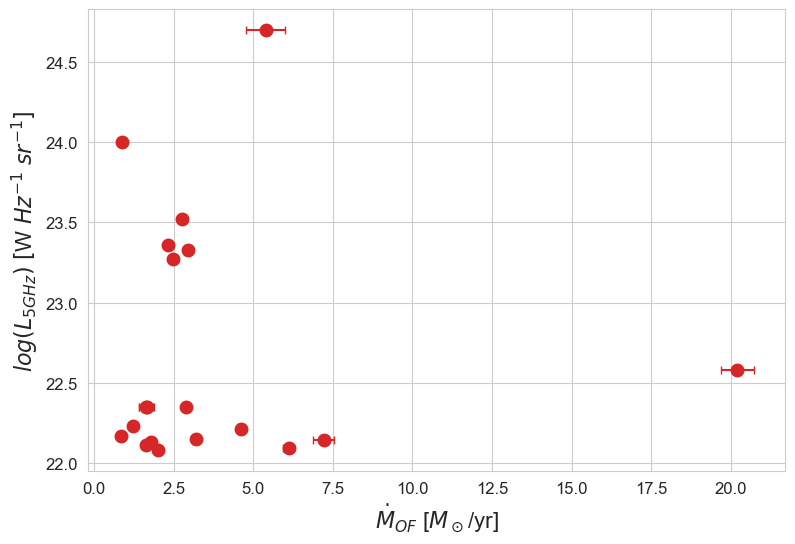

In [12]:
fig, ax = plt.subplots(figsize=(9,6))
plt.errorbar(outflow_info['M.of'],outflow_info['logL5GHz'],xerr=outflow_info['eM.of'],fmt='none',ecolor=red,capsize=3)
ax.scatter(outflow_info['M.of'],outflow_info['logL5GHz'],marker='o',color=red,linewidth=4)
ax.tick_params(axis='both', labelsize=12)
plt.xlabel(r'$\dot{M}_{OF}$ [$M_\odot$/yr]',fontsize=16)
plt.ylabel(r'$log(L_{5GHz})$ $[$W $Hz^{-1}$ $sr^{-1}$$]$',fontsize=16)
plt.savefig('Graphs/radio_omr.pdf',bbox_inches='tight')

Text(0, 0.5, '$log(L_{5GHz})$ $[$W $Hz^{-1}$ $sr^{-1}$$]$')

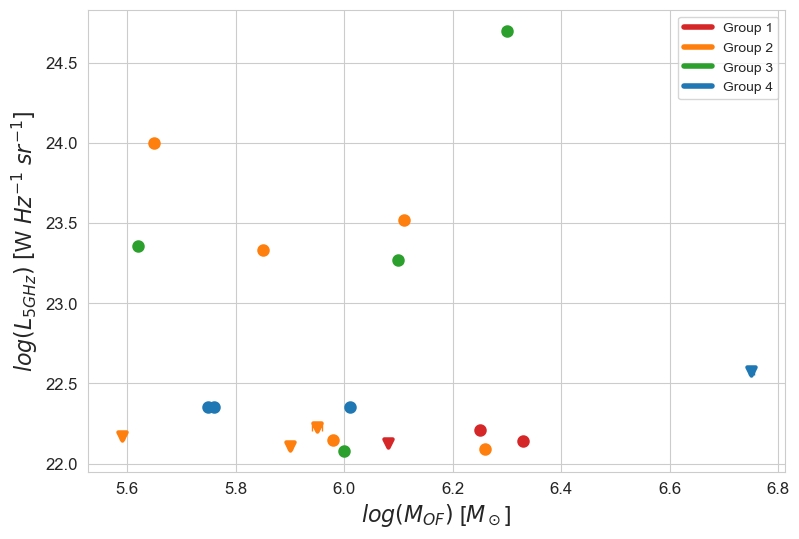

In [13]:
fig, ax = plt.subplots(figsize=(9,6))
for i in range(len(outflow_info['Name'])):
    if outflow_info['Name'][i]=='J0142+14'  or outflow_info['Name'][i]=='J0218-00' or outflow_info['Name'][i]=='J0227+01' or outflow_info['Name'][i]=='J0320+00' or outflow_info['Name'][i]=='J0334+00' or outflow_info['Name'][i]=='J02358-00':
        if outflow_info['groups'][i]==1:
            ax.scatter(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],marker='v',color=red,linewidth=3)
            plt.errorbar(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eLogMof'][i],fmt='none',ecolor=red,capsize=3)   
        if outflow_info['groups'][i]==2:
            ax.scatter(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],marker='v',color=orange,linewidth=3)
            plt.errorbar(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eLogMof'][i],fmt='none',ecolor=orange,capsize=3)   
        if outflow_info['groups'][i]==3:
            ax.scatter(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],marker='v',color=green,linewidth=3)
            plt.errorbar(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eLogMof'][i],fmt='none',ecolor=green,capsize=3)       
        if outflow_info['groups'][i]==4:
            ax.scatter(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],marker='v',color=blue,linewidth=3)
            plt.errorbar(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eLogMof'][i],fmt='none',ecolor=blue,capsize=3)   

    else:
        if outflow_info['groups'][i]==1:
            ax.scatter(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],marker='o',color=red,linewidth=3)
            plt.errorbar(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eLogMof'][i],fmt='none',ecolor=red,capsize=3)   
        if outflow_info['groups'][i]==2:
            ax.scatter(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],marker='o',color=orange,linewidth=3)
            plt.errorbar(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eLogMof'][i],fmt='none',ecolor=orange,capsize=3)   
        if outflow_info['groups'][i]==3:
            ax.scatter(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],marker='o',color=green,linewidth=3)
            plt.errorbar(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eLogMof'][i],fmt='none',ecolor=green,capsize=3)       
        if outflow_info['groups'][i]==4:
            ax.scatter(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],marker='o',color=blue,linewidth=3)
            plt.errorbar(outflow_info['LogMof'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eLogMof'][i],fmt='none',ecolor=blue,capsize=3)   

custom_lines = [Line2D([0], [0], color=red, lw=4),
                Line2D([0], [0], color=orange, lw=4),
                Line2D([0], [0], color=green, lw=4),
                Line2D([0], [0], color=blue, lw=4)]
ax.legend(custom_lines, ['Group 1','Group 2','Group 3','Group 4'])           
ax.tick_params(axis='both', labelsize=12)
plt.xlabel(r'$log(M_{OF})$ [$M_\odot$]',fontsize=16)
plt.ylabel(r'$log(L_{5GHz})$ $[$W $Hz^{-1}$ $sr^{-1}$$]$',fontsize=16)

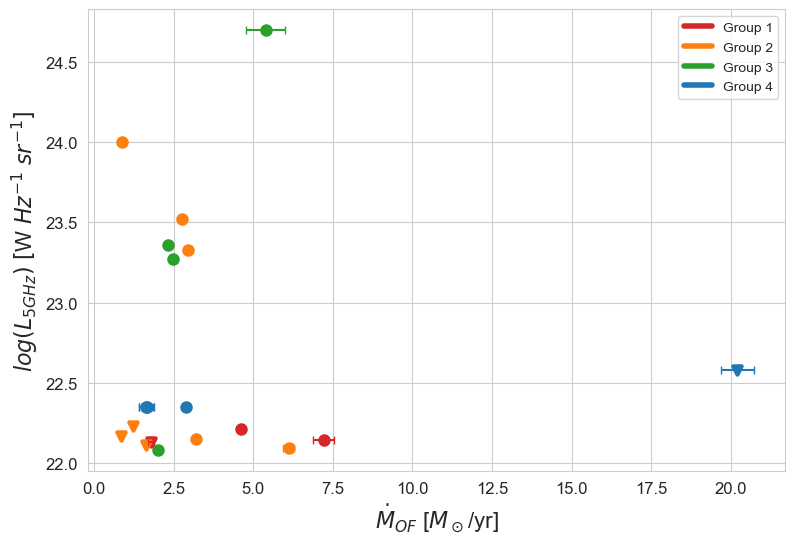

In [14]:
fig, ax = plt.subplots(figsize=(9,6))
for i in range(len(outflow_info['Name'])):
    if outflow_info['Name'][i]=='J0142+14'  or outflow_info['Name'][i]=='J0218-00' or outflow_info['Name'][i]=='J0227+01' or outflow_info['Name'][i]=='J0320+00' or outflow_info['Name'][i]=='J0334+00' or outflow_info['Name'][i]=='J02358-00':
        if outflow_info['groups'][i]==1:
            ax.scatter(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],marker='v',color=red,linewidth=3)
            plt.errorbar(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eM.of'][i],fmt='none',ecolor=red,capsize=3)   
        if outflow_info['groups'][i]==2:
            ax.scatter(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],marker='v',color=orange,linewidth=3)
            plt.errorbar(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eM.of'][i],fmt='none',ecolor=orange,capsize=3)   
        if outflow_info['groups'][i]==3:
            ax.scatter(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],marker='v',color=green,linewidth=3)
            plt.errorbar(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eM.of'][i],fmt='none',ecolor=green,capsize=3)       
        if outflow_info['groups'][i]==4:
            ax.scatter(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],marker='v',color=blue,linewidth=3)
            plt.errorbar(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eM.of'][i],fmt='none',ecolor=blue,capsize=3)   

    else:
        if outflow_info['groups'][i]==1:
            ax.scatter(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],marker='o',color=red,linewidth=3)
            plt.errorbar(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eM.of'][i],fmt='none',ecolor=red,capsize=3)   
        if outflow_info['groups'][i]==2:
            ax.scatter(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],marker='o',color=orange,linewidth=3)
            plt.errorbar(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eM.of'][i],fmt='none',ecolor=orange,capsize=3)   
        if outflow_info['groups'][i]==3:
            ax.scatter(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],marker='o',color=green,linewidth=3)
            plt.errorbar(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eM.of'][i],fmt='none',ecolor=green,capsize=3)       
        if outflow_info['groups'][i]==4:
            ax.scatter(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],marker='o',color=blue,linewidth=3)
            plt.errorbar(outflow_info['M.of'][i],outflow_info['logL5GHz'][i],xerr=outflow_info['eM.of'][i],fmt='none',ecolor=blue,capsize=3)   

custom_lines = [Line2D([0], [0], color=red, lw=4),
                Line2D([0], [0], color=orange, lw=4),
                Line2D([0], [0], color=green, lw=4),
                Line2D([0], [0], color=blue, lw=4)]
ax.legend(custom_lines, ['Group 1','Group 2','Group 3','Group 4'])           
ax.tick_params(axis='both', labelsize=12)
plt.xlabel(r'$\dot{M}_{OF}$ [$M_\odot$/yr]',fontsize=16)
plt.ylabel(r'$log(L_{5GHz})$ $[$W $Hz^{-1}$ $sr^{-1}$$]$',fontsize=16)
plt.savefig('Graphs/radio_omr_groups.pdf',bbox_inches='tight')

## Environment

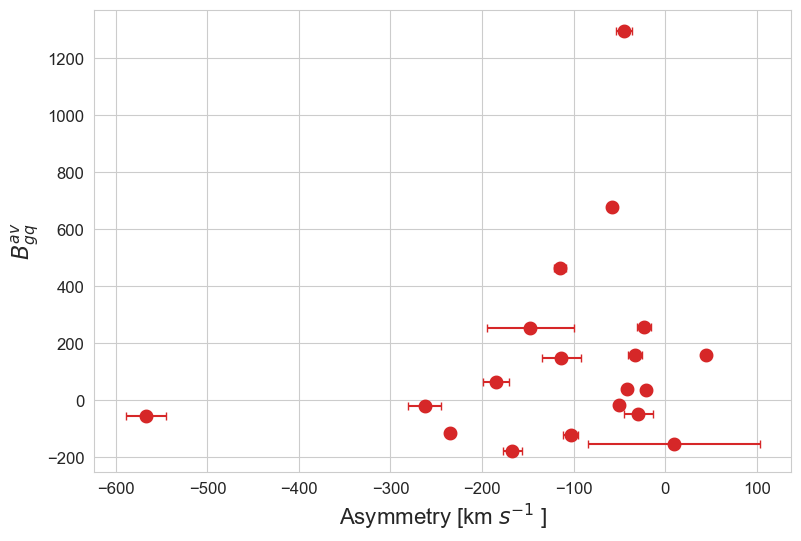

In [15]:
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(nonpar_info['Asymmetry'],nonpar_info['b_gp'],marker='o',color=red,linewidth=4)
plt.errorbar(nonpar_info['Asymmetry'],nonpar_info['b_gp'],xerr=nonpar_info['eAsymmetry'],fmt='none',ecolor=red,capsize=3)
ax.tick_params(axis='both', labelsize=12)
plt.xlabel(r'Asymmetry [km $s^{-1}$ ]',fontsize=16)
plt.ylabel(r'$B_{gq}^{av}$',fontsize=16)
plt.savefig('Graphs/Bgq_asym.pdf',bbox_inches='tight')

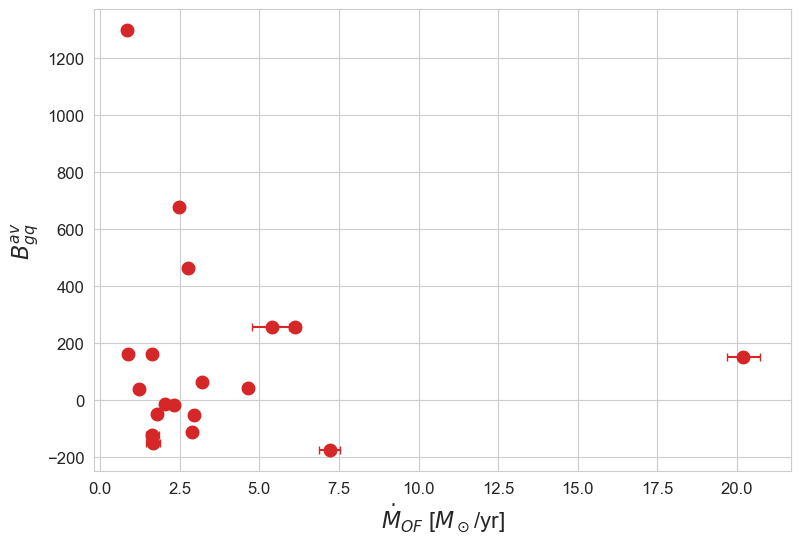

In [16]:
fig, ax = plt.subplots(figsize=(9,6))
plt.errorbar(outflow_info['M.of'],outflow_info['b_gp'],xerr=outflow_info['eM.of'],fmt='none',ecolor=red,capsize=3)
ax.scatter(outflow_info['M.of'],outflow_info['b_gp'],marker='o',color=red,linewidth=4)
ax.tick_params(axis='both', labelsize=12)
plt.xlabel(r'$\dot{M}_{OF}$ [$M_\odot$/yr]',fontsize=16)
plt.ylabel(r'$B_{gq}^{av}$',fontsize=16)
plt.savefig('Graphs/Bgq_omr.pdf',bbox_inches='tight')